<a href="https://colab.research.google.com/github/raphaelp-silva/deep_learning_com_pytorch_e_python/blob/main/Projeto_1_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
import torch
torch.__version__

'2.5.1+cu124'

In [5]:
# impotando o pacote .nn (neural network)
import torch.nn as nn

## Etapa 2: Base de dados

In [6]:
np.random.seed(123) # garantindo que ao gerar valores aleatórios será retornado sempre os mesmos valores.
torch.manual_seed(123) # garantindo que ao gerar valores aleatórios será retornado sempre os mesmos valores.

In [7]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [10]:
previsores.shape

(569, 30)

In [11]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [20]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [21]:
np.unique(classe)

array([0, 1])

<Axes: xlabel='0', ylabel='count'>

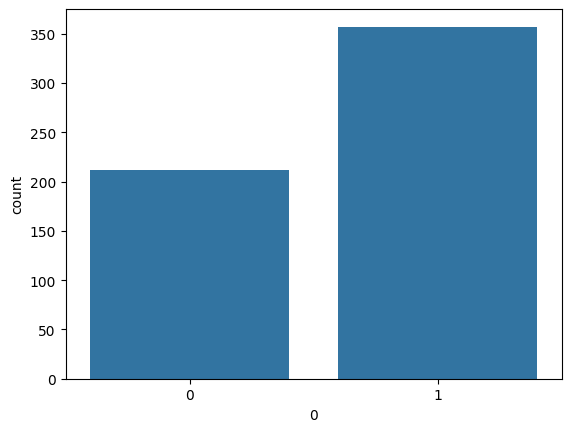

In [27]:
# visualizando a divisão das classes em gráfico
sns.countplot(x=classe['0'])

In [29]:
# seprando os dados para treinamento, usaremos 25% para teste e o restante (75%) será para treinamento.
# função train_test_split do scikit-learn
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                               classe,
                                                                                               test_size = 0.25)

In [30]:
previsores_treinamento.shape #confirmando os valores

(426, 30)

In [31]:
classe_treinamento.shape #confirmando os valores

(426, 1)

In [32]:
previsores_teste.shape #confirmando os valores

(143, 30)

In [33]:
classe_teste.shape #confirmando os valores

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [34]:
# verificando o tipo do dataframe, precisaremos transformar do pandas para o numpy e posteriormente do numpy para o pytorch.
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [35]:
type(np.array(previsores_treinamento)) #convertendo de dataframe(pandas) para um array do numpy (np.array)

numpy.ndarray

In [36]:
# redefinindo a variável para tranforma-la em um tensor do torch
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype = torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [37]:
type(previsores_treinamento) #verificando se a conversão foi bem sucedida

torch.Tensor

In [38]:
type(classe_treinamento) #verificando se a conversão foi bem sucedida

torch.Tensor

In [39]:
# Criando um dataset unificando as duas variáveis (previsores_treinamento e classe_treinamento):
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
# quando criar a rede neural, utilizar a variável 'dataset' para passar os parametros para o treinamento

In [40]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [41]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
# batch_size é o número de registros que o modelo vai utilizar para calcular o erro e ajustar os pesos ou seja, a cada 10 registros o modelo vai ajustar os pesos.

## Etapa 4: Construção do modelo

In [42]:
# construindo uma rede neural com 30 neurônios na camada de entrada (pois temos 30 atributos no dataset)
# segunda camada oculta terá 16 neurônios -> para definir esse numero de neuronio foi utilizado a formula somando as entradas com a saída e dividindo por 2 (30 + 1) / 2 = arredondando 16.
# terceira camada oculta com 16 neurônios
# camada de saída com 1 neurônio (resposta binária)
# 30 -> 16 -> 16 -> 1
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16), #Linear = densa. Todos os neurônios da camada de entrada se liga com a segunda camada
    nn.ReLU(), # a função relu será aplicada nos 16 neurônios da camada.
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid() # função sigmoide será aplicada na camada de saída o que nos retornará um valor entre 0 e 1.
    )

In [45]:
classificador.parameters #verificando os parâmetros da rede neural

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [46]:
# criando a função de erro:
criterion = nn.BCELoss()

In [47]:
# criando o otimizador (utilizamos o Adam):
optimizer = torch.optim.Adam(classificador.parameters(), lr = 0.001, weight_decay = 0.0001) # lr= learing rate // weight_decay é um penalizador dos pesos

## Etapa 5: Treinamento do modelo

OBS -->  Nossa base de treinamento possui 426 registros que serão passados de 10 em 10 (de acordo com o batch_size), ou seja 426 / 10 == 43 (arredondando), portanto serão feito 43 ajustes de peso dentro de cada época durante o treinamento.

In [52]:
for epoch in range (100):
  running_loss = 0.
  for data in train_loader:
    inputs, labels = data
    optimizer.zero_grad()

    outputs = classificador(inputs) #clasificador é o nome do modelo que definimos acima
    loss = criterion(outputs, labels) #criterion é a variavel que calcula o erro que definimos acima. outputs == predições e labels == valores reais
    loss.backward() # backpropagation
    optimizer.step() # atualizando os pesos

    running_loss += loss.item()
  print('Época %3d: perda %5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.760238
Época   2: perda 3.705945
Época   3: perda 1.904467
Época   4: perda 1.795768
Época   5: perda 1.759819
Época   6: perda 1.760093
Época   7: perda 1.722018
Época   8: perda 1.771052
Época   9: perda 2.006565
Época  10: perda 1.715389
Época  11: perda 1.670474
Época  12: perda 1.456860
Época  13: perda 0.623372
Época  14: perda 0.537710
Época  15: perda 0.541722
Época  16: perda 0.521144
Época  17: perda 0.294860
Época  18: perda 0.253542
Época  19: perda 0.289999
Época  20: perda 0.273561
Época  21: perda 0.262043
Época  22: perda 0.258647
Época  23: perda 0.247403
Época  24: perda 0.241022
Época  25: perda 0.248748
Época  26: perda 0.267257
Época  27: perda 0.242532
Época  28: perda 0.251094
Época  29: perda 0.203413
Época  30: perda 0.196510
Época  31: perda 0.190748
Época  32: perda 0.244804
Época  33: perda 0.253191
Época  34: perda 0.192461
Época  35: perda 0.251824
Época  36: perda 0.228153
Época  37: perda 0.204842
Época  38: perda 0.198437
Época  39: 

## Etapa 6: Visualização dos pesos

In [ ]:
# 30 -> 16 -> 16 -> 1 // estrutura da nossa rede neural
params = list(classificador.parameters())

In [55]:
# pesos da primeira camada
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [56]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [57]:
# pesos da segunda camada (primeira camada oculta)
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [58]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [59]:
 classificador.eval() # colocando o classificador em modo de avaliacao. (caso nao seja feito, ele continua treinando o modelo)

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [60]:
type(previsores_teste) # verificamos que o mesmo encontra-se como dataframe do pandas. Precisamos converter para o torch

pandas.core.frame.DataFrame

In [61]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype = torch.float)
# nao faremos com a classe pois vamos testar o modelo de predição da classe .

In [63]:
type(previsores_teste)

torch.Tensor

In [64]:
previsoes = classificador(previsores_teste)

In [67]:
previsoes = np.array(previsoes > 0.5) # se o valor da probabilidade for maior 0.5 ele indicará que o retorno será 1.
previsoes #  1 = True // 0 = False

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [68]:
taxa_acerto = accuracy_score(classe_teste,previsoes)
taxa_acerto

0.8741258741258742

In [69]:
# criando a matriz de confusao:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[47,  7],
       [11, 78]])

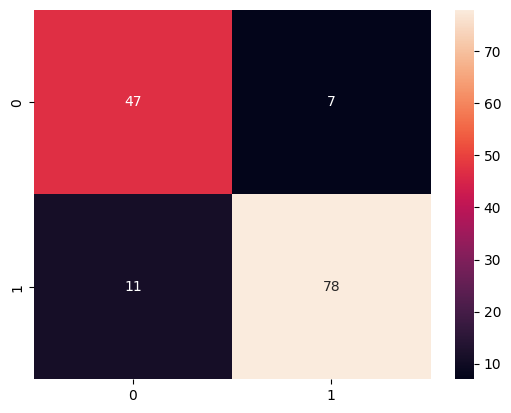

In [70]:
sns.heatmap(matriz, annot=True);